# imports

In [236]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (15,7)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [2]:
!ls

geo_data_0.csv geo_data_2.csv ntb.ipynb
geo_data_1.csv karpov         task.md


# data load

In [3]:
gd_0 = pd.read_csv('geo_data_0.csv')
gd_1 = pd.read_csv('geo_data_1.csv')
gd_2 = pd.read_csv('geo_data_2.csv')

In [7]:
gd_0.describe(percentiles=[0, 0.5, 0.9, 0.99])

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
0%,-1.408605,-0.848218,-12.088328,0.000000
50%,0.502360,0.250252,2.515969,91.849972
90%,1.794422,0.941442,6.695514,152.649988
99%,2.082334,1.121338,9.969349,180.351516
max,2.362331,1.343769,16.003790,185.364347


In [9]:
gd_1.describe(percentiles=[0, 0.5, 0.9, 0.99])

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
0%,-31.609576,-26.358598,-0.018144,0.000000
50%,1.153055,-4.813172,2.011479,57.085625
90%,12.767695,1.781792,4.998679,134.766305
99%,18.863531,7.139352,5.007810,137.945408
max,29.421755,18.734063,5.019721,137.945408


In [10]:
gd_2.describe(percentiles=[0, 0.5, 0.9, 0.99])

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
0%,-8.760004,-7.084020,-11.970335,0.000000
50%,0.009424,-0.009482,2.484236,94.925613
90%,2.228062,2.219972,6.973332,155.391030
99%,4.057783,4.020189,10.511973,184.995815
max,7.238262,7.844801,16.739402,190.029838


In [17]:
#проверка на дубликаты и пропуски в данных, корректные типы данных
region_dfs = [gd_0, gd_1, gd_2]

for i in range(len(region_dfs)):
    print('region', i)
    region_dfs[i].info()
    print('duplicates', region_dfs[i].isnull().sum(), '\n')
    print('duplicates', region_dfs[i].duplicated().sum())

region 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
duplicates id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

duplicates 0
region 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
duplicates

# data analysis

проанализируем сначала один df, потом соберем все в функцию 

In [102]:
for i in range(len(region_dfs)):
    region_dfs[i]['region'] = i
    print(region_dfs[i].head())

df = pd.concat(region_dfs).reset_index()

      id        f0        f1        f2     product  region
0  txEyH  0.705745 -0.497823  1.221170  105.280062       0
1  2acmU  1.334711 -0.340164  4.365080   73.037750       0
2  409Wp  1.022732  0.151990  1.419926   85.265647       0
3  iJLyR -0.032172  0.139033  2.978566  168.620776       0
4  Xdl7t  1.988431  0.155413  4.751769  154.036647       0
      id         f0         f1        f2     product  region
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103       1
1  62mP7  14.272088  -3.475083  0.999183   26.953261       1
2  vyE1P   6.263187  -5.948386  5.001160  134.766305       1
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408       1
4  AHL4O  12.702195  -8.147433  5.004363  134.766305       1
      id        f0        f1        f2     product  region
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673       2
1  WJtFt  0.262778  0.269839 -2.530187   56.069697       2
2  ovLUW  0.194587  0.289035 -5.586433   62.871910       2
3  q6cA6  2.236060 -0.553760  0.930038  114.

In [103]:
#проверка на уникальность айдишников скважины 
df['id'].value_counts().head()

uSye4    2
KUPhW    2
5ssQt    2
D8TNs    2
A5aEY    2
Name: id, dtype: int64

выяснилось, что и не такие уж они уникальные, может стоить подумтаь над тем, чтобы выкинуть, а может надо оставить. 
подожду ответ от Алана 

In [104]:
df.query('id == "fiKDv"')

,index,id,f0,f1,f2,product,region
16633,16633,fiKDv,0.157341,1.028359,5.585586,95.817889,0
90815,90815,fiKDv,0.049883,0.841313,6.394613,137.346586,0


In [106]:
df.shape


(300000, 7)

## feature analisys

feature f0
              f0                                
            mean    median        min        max
region                                          
0       0.500419  0.502360  -1.408605   2.362331
1       1.141296  1.153055 -31.609576  29.421755
2       0.002023  0.009424  -8.760004   7.238262


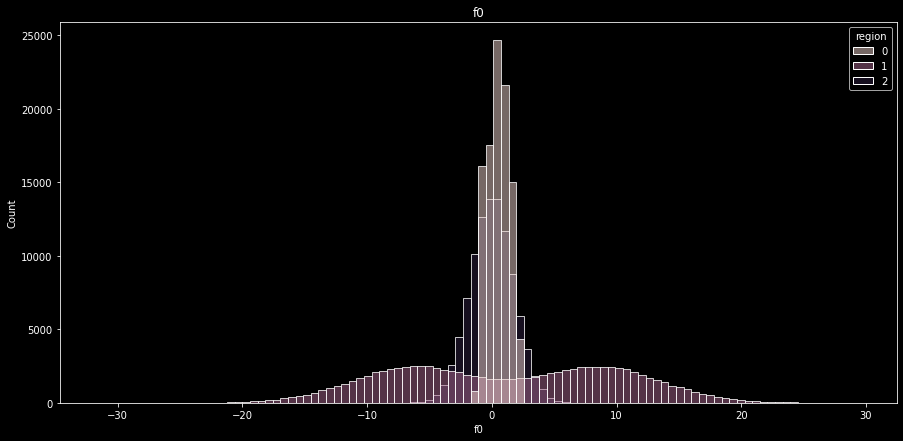

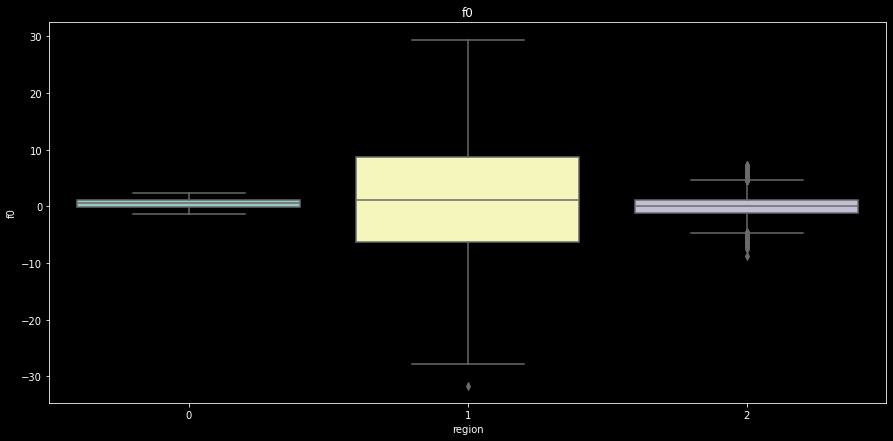

feature f1
              f1                                
            mean    median        min        max
region                                          
0       0.250143  0.250252  -0.848218   1.343769
1      -4.796579 -4.813172 -26.358598  18.734063
2      -0.002081 -0.009482  -7.084020   7.844801


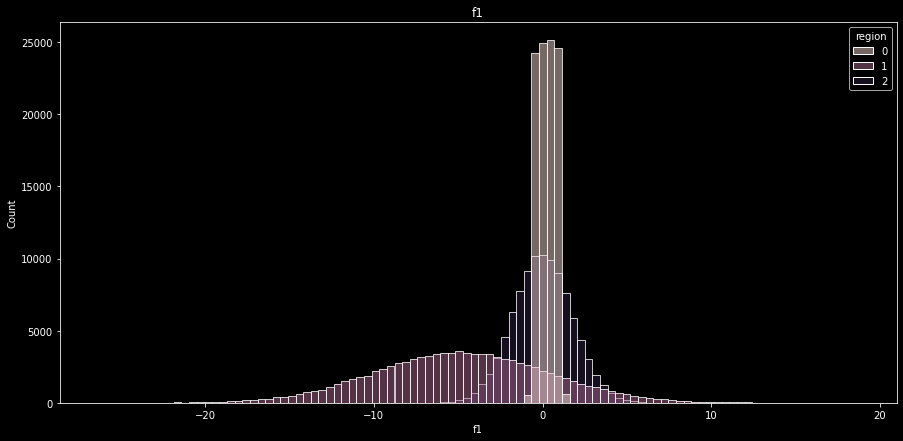

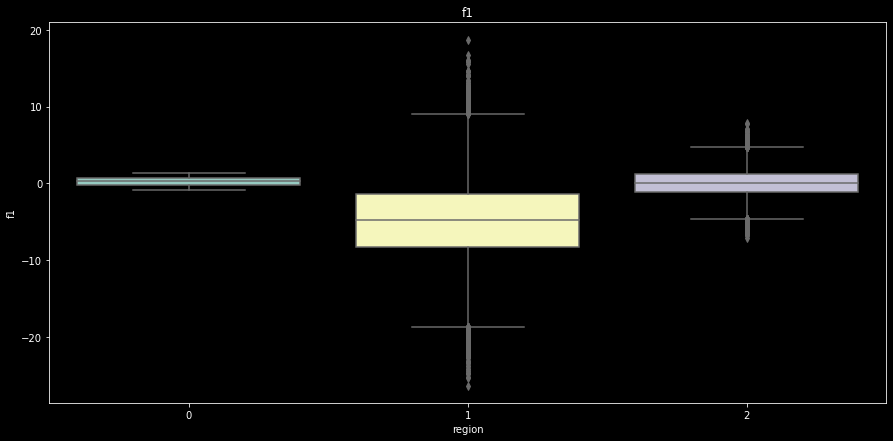

feature f2
              f2                                
            mean    median        min        max
region                                          
0       2.502647  2.515969 -12.088328  16.003790
1       2.494541  2.011479  -0.018144   5.019721
2       2.495128  2.484236 -11.970335  16.739402


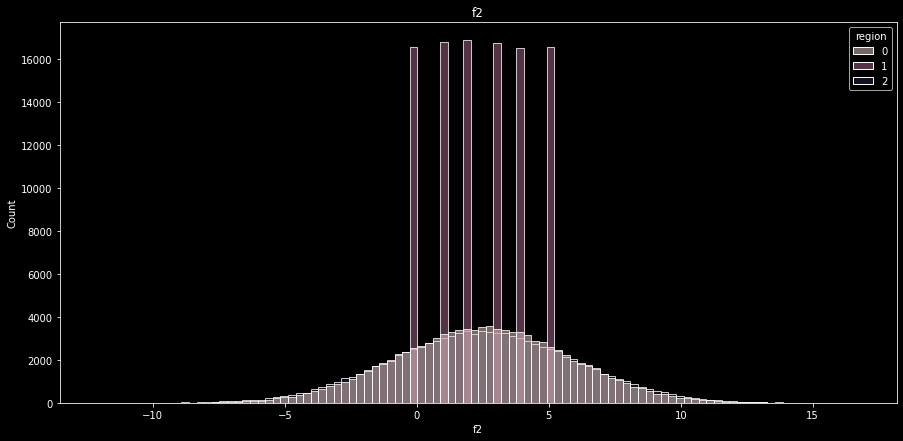

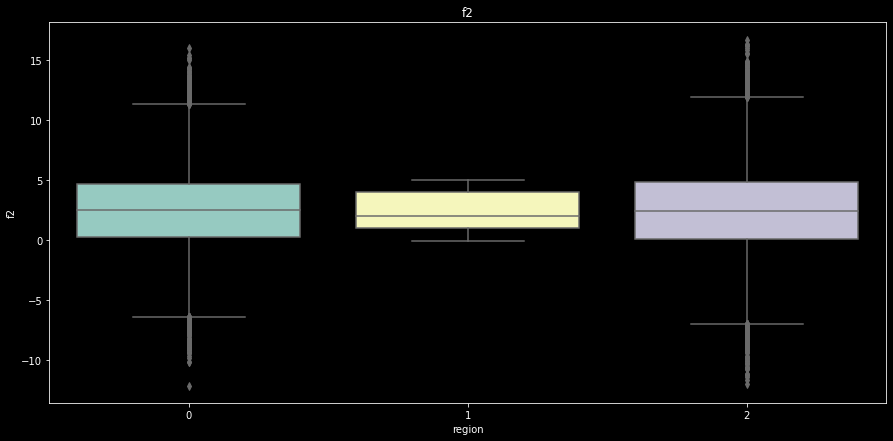

feature product
       product                            
          mean     median  min         max
region                                    
0       92.500  91.849972  0.0  185.364347
1       68.825  57.085625  0.0  137.945408
2       95.000  94.925613  0.0  190.029838


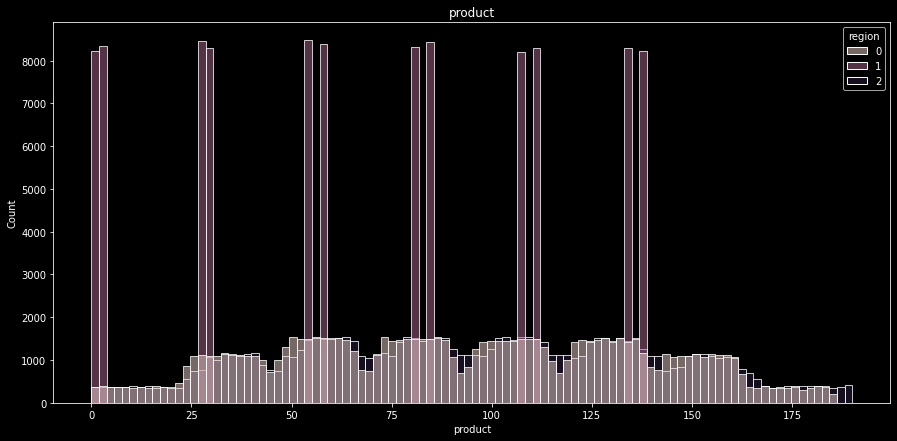

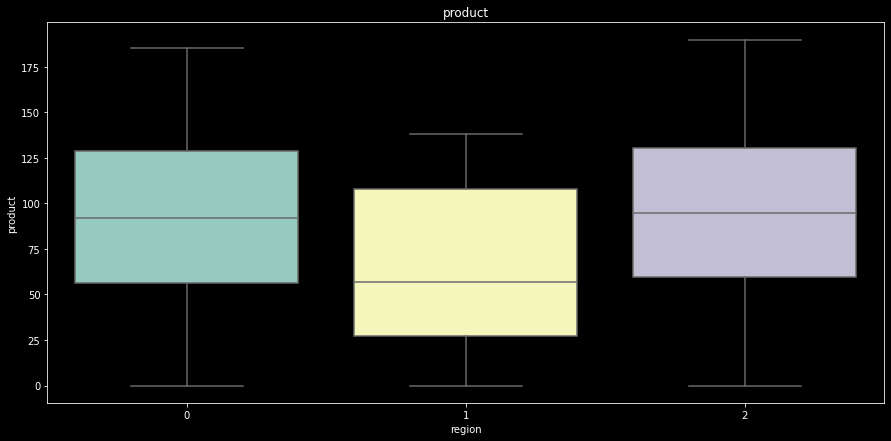

In [114]:
#посмотрим на каждую фичу в отдельности 
for col in ['f0', 'f1', 'f2', 'product']:
    print('feature', col)
    rep = df.groupby('region').agg({col:['mean', 'median', 'min', 'max']})
    print(rep)
    plt.title(col)
    sns.histplot(data=df[[col, 'region']], x=col, kde=False, hue='region', bins=100)
    plt.show()
    plt.title(col)
    sns.boxplot(data=df[[col, 'region']], y=col, x="region",) 
    plt.show()

## correlation

In [115]:
df

,index,id,f0,f1,f2,product,region
0,0,txEyH,0.705745,-0.497823,1.221170,105.280062,0
1,1,2acmU,1.334711,-0.340164,4.365080,73.037750,0
2,2,409Wp,1.022732,0.151990,1.419926,85.265647,0
3,3,iJLyR,-0.032172,0.139033,2.978566,168.620776,0
4,4,Xdl7t,1.988431,0.155413,4.751769,154.036647,0
...,...,...,...,...,...,...,...
299995,99995,4GxBu,-1.777037,1.125220,6.263374,172.327046,2
299996,99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846,2
299997,99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080,2
299998,99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253,2


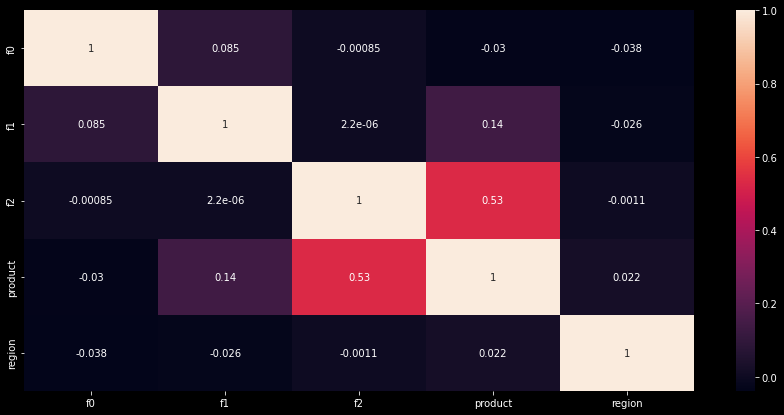

region 0


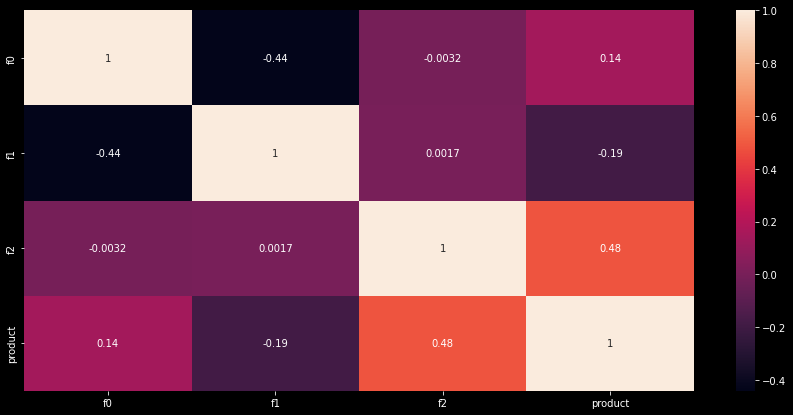

region 1


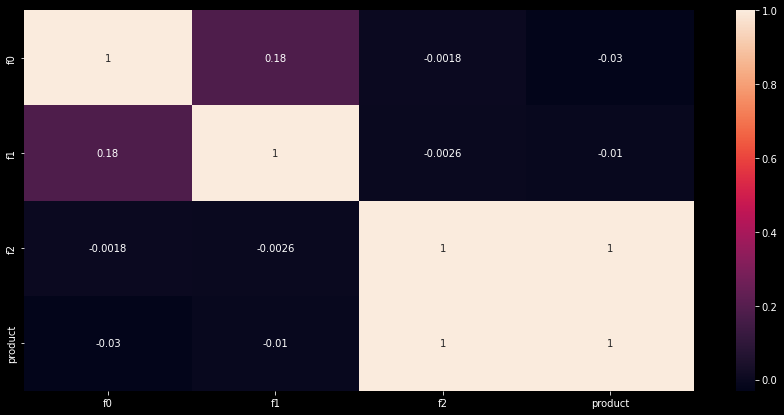

region 2


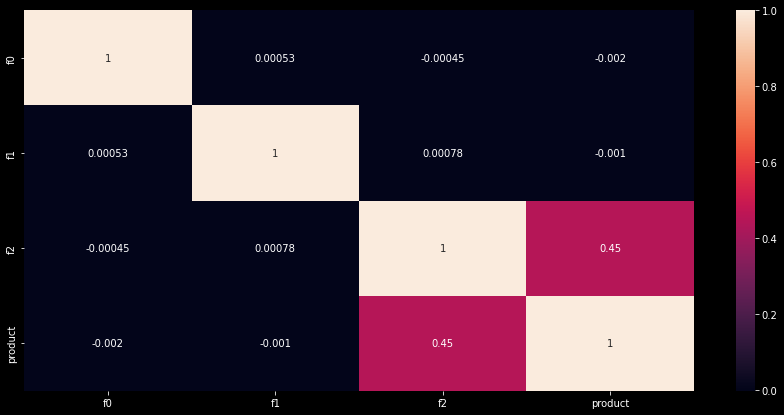

In [122]:
#общая корелляция 
sns.heatmap(df.drop(['id', 'index'], axis = 1).corr(), annot=True)
plt.show()
#по регионам 
for i in range(3):
    print('region', i)
    sns.heatmap(df.query('region == @i').drop(['id', 'index', 'region'], axis = 1).corr(), annot=True)
    plt.show()

получается, что сверхсильной корелляции нет, но вполне приличная существует. Больше всего влияет признак f2. f1 | f2  влияют примерно одинаково, но у целевого признака и  f1 корелляция отрицательная

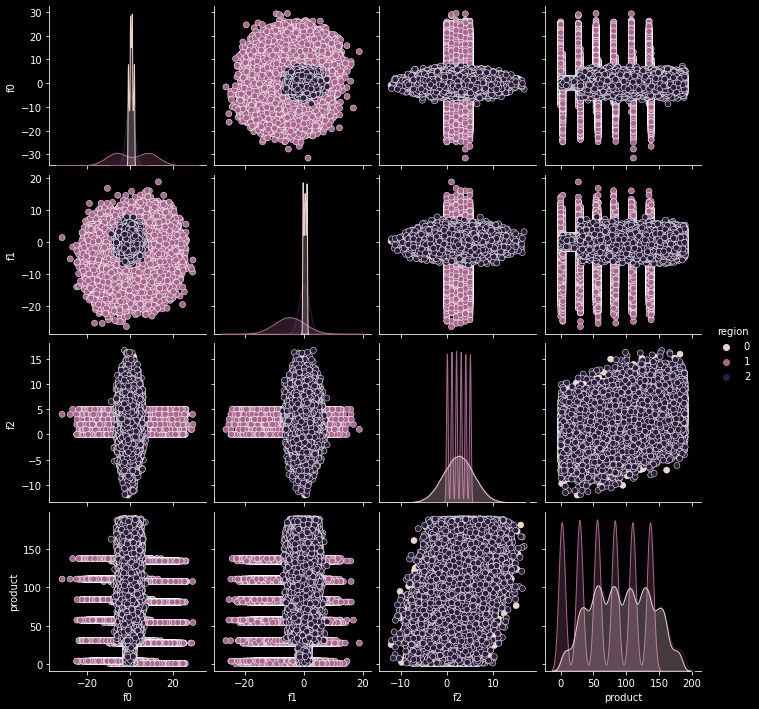

In [123]:
sns.pairplot(df.drop(['id', 'index'], axis=1), hue = 'region')

вывод: данные лютая хуйня 

# reg model 


Обучите и проверьте модель для каждого региона:

 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.

 2.2. Обучите модель и сделайте предсказания на валидационной выборке.

 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.

 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
 
 2.5. Проанализируйте результаты.

## проба модели

In [127]:
df.head()

,index,id,f0,f1,f2,product,region
0,0,txEyH,0.705745,-0.497823,1.221170,105.280062,0
1,1,2acmU,1.334711,-0.340164,4.365080,73.037750,0
2,2,409Wp,1.022732,0.151990,1.419926,85.265647,0
3,3,iJLyR,-0.032172,0.139033,2.978566,168.620776,0
4,4,Xdl7t,1.988431,0.155413,4.751769,154.036647,0


In [251]:
reg = 2
features = ['f0', 'f1', 'f2']
target = ['product']

df_reg = df.query('region == @reg')
#df_reg = gd_0

In [252]:
#почистим выбросы 
def df_clean(df_reg):
    for col in df_reg[features].columns:
        sns.boxplot(df_reg[col])
        plt.show()
        lower = np.percentile(df_reg[col], 2)
        upper = np.percentile(df_reg[col], 98)
        print(col)
        print(lower)
        print(upper)
        
        
        df_reg = df_reg[(df_reg[col]> lower) & (df_reg[col]<upper)]
        sns.boxplot(df_reg[col])
        plt.show()
        return df_reg 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


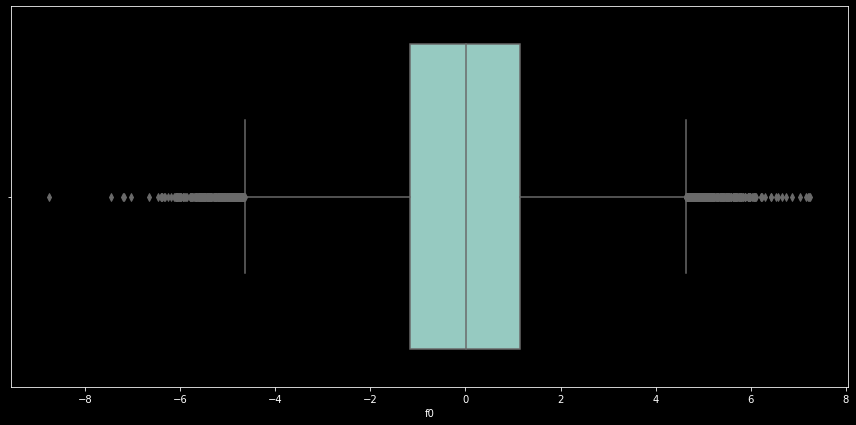

f0
-3.5478117200133066
3.5829020551815196


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


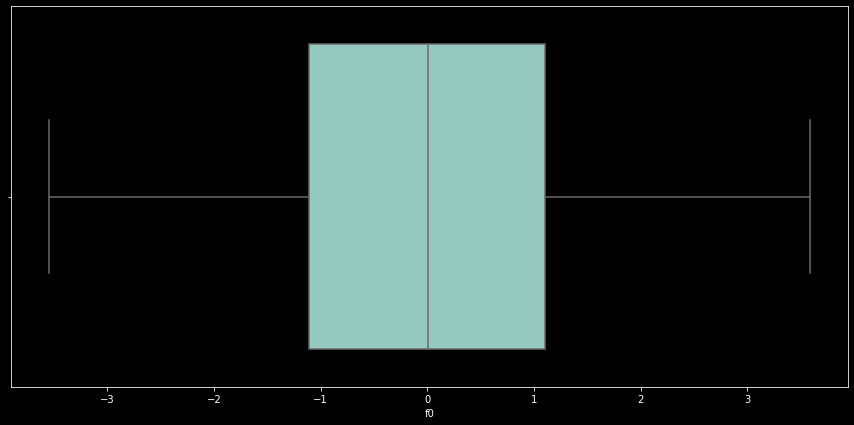

In [253]:
df_reg = df_clean(df_reg)

In [254]:
def make_prediction(model, x_train, y_train, x_valid, y_valid): 

    sc = StandardScaler()
    sc.fit(x_train)
    x_train_sc = sc.transform(x_train)
    x_valid_sc = sc.transform(x_valid)

    model.fit(x_train_sc, y_train)
    #model.fit(x_train, y_train)

    pred = model.predict(x_valid_sc)
    mse = mean_squared_error(y_valid, pred)

    print(mse**0.5)

    return model 


In [255]:
#train (train + valid) | test
X_train, x_test, Y_train, y_test = train_test_split(df_reg[features], df_reg[target], test_size=0.1, random_state=42)
#train | valid
x_train, x_valid, y_train, y_valid  = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [256]:
model = LinearRegression()
lin_model = make_prediction(model, x_train, y_train, x_valid, y_valid)


40.050422811039596


In [257]:
import catboost

In [258]:
ctb = catboost.CatBoostRegressor()

In [259]:
ctb_result = make_prediction(ctb,  x_train, y_train, x_valid, y_valid)

Learning rate set to 0.079142
0:	learn: 43.9066136	total: 2.86ms	remaining: 2.86s
1:	learn: 43.1958606	total: 9.4ms	remaining: 4.69s
2:	learn: 42.5677618	total: 13.3ms	remaining: 4.44s
3:	learn: 42.0147154	total: 18.2ms	remaining: 4.54s
4:	learn: 41.5038856	total: 24.8ms	remaining: 4.93s
5:	learn: 41.0330701	total: 28.8ms	remaining: 4.78s
6:	learn: 40.6767224	total: 33.2ms	remaining: 4.71s
7:	learn: 40.3454334	total: 45.8ms	remaining: 5.68s
8:	learn: 40.0229368	total: 49.1ms	remaining: 5.41s
9:	learn: 39.7734020	total: 52.5ms	remaining: 5.2s
10:	learn: 39.5423091	total: 56.2ms	remaining: 5.05s
11:	learn: 39.3258941	total: 59.7ms	remaining: 4.92s
12:	learn: 39.1324243	total: 63.7ms	remaining: 4.83s
13:	learn: 38.9616504	total: 67.4ms	remaining: 4.75s
14:	learn: 38.8339882	total: 70.1ms	remaining: 4.6s
15:	learn: 38.7116221	total: 73.7ms	remaining: 4.53s
16:	learn: 38.6071209	total: 76.6ms	remaining: 4.43s
17:	learn: 38.5050830	total: 80ms	remaining: 4.37s
18:	learn: 38.4185909	total: 83